# Part I - (FordGoBike Dataset Exploration)
## by (Faluta Opeyemi)

## Introduction
 This data set contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. For more information about bike-sharing system, a quick look at dataset site for bike sharing page has been included here:  https://www.lyft.com/bikes/bay-wheels/system-data. The dataset has quality and tidyness issues and this will be addressed after the preliminary wrangling. 


## Preliminary Wrangling/ Accessing Data


Import packages

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
# A quick look at the dataset using .head() 
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv',sep = ',')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#displaying the amount of records in this dataframe
bike_df.shape

(183412, 16)

In [4]:
#inspecting the data type of the data frame using .info

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# displaying the statistical description of the data
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#checking for duplicates
bike_df.duplicated().sum()

0

There are no duplicates present

In [7]:
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are lots of null values especially in the gender and birth year.

### What is the structure of your dataset?

i.  Duration of each bike ride in seconds
<br>ii. User type of the person renting the bike (classified into customers and subscribers)
<br>iii.longitutde and latitude of the start and end points
<br>iv. Gender classification of bike users.
<br>v. Start and end station id
<br>vi. User birth year
<br>vii. Boolean bike share trip data
<br>viii.There are 183412 rows x 16 columns. 


### Main feature(s) of interest in this dataset.

I am intrested in knowing how subscribers vs customers use the bike share service in terms of days of the week, age groups, speed, ride distance.  


I expect that subscribers will have a longer ride time and distance since they have shown a strong commitment to the continuous usage of the service. Variables such as age, gender, start station name, end station name, user type, duration, start station longitude, start station latitude, end station longitude and latitude will be of use for this analysis. 

### Quality and Structural Issues Documentation
The documentation of both the quality (dirty) and Tidyness (structural) issues will be captured here. There were gotten visually and programmatically.

#### Quality issue
<br>i.    `bike_df`: Empty columns in bike_df dataframe.
<br>ii.   `bike_df`: Wrong data types.
<br>iii. `bike_df`: Time is recorded in seconds 
 

#### Tidyness issue
<br>i. `bike_df`: There are some redundant columns in the dataset.

These issues will be rectified using the define, code and test method in the data cleaning process.

## Data Cleaning
#### Quality issues

In [8]:
# before cleaning, a copy of this data will be made.

bike_dfc = bike_df.copy()

<b>Task 1:</b> Empty columns in bike_df 

<b>Define:</b> Drop empty columns. 

<b>Code:</b>

In [9]:
#.dropna(), this removes null values from the dataframe.
bike_dfc.dropna(inplace = True)

<b> Test:</b>

In [10]:
print(bike_dfc.isnull().sum())

print("The null/empty values were dropped")

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64
The null/empty values were dropped


<b>Task 2:</b> Wrong data types
<br>    <b>Define:</b> Change data types where applicable

In [11]:
bike_dfc.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

2a) <b>Define:</b> Chaniging start time & end time from object to date and time data type.

<b>Code:</b>

In [12]:
bike_dfc['start_time'] = pd.to_datetime(bike_dfc['start_time'])
bike_dfc['end_time'] = pd.to_datetime(bike_dfc['end_time'])

<b> Test:</b>

In [13]:
print(bike_dfc['start_time'].info())
print(bike_dfc['end_time'].info())

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: start_time
Non-Null Count   Dtype         
--------------   -----         
174952 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB
None
<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: end_time
Non-Null Count   Dtype         
--------------   -----         
174952 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB
None


2b) <b>Define:</b>Change member birth year to int



<b>Code:</b>

In [14]:
bike_dfc['member_birth_year'] = bike_dfc['member_birth_year'].astype('int64')

<b>Test:</b>

In [15]:
bike_dfc['member_birth_year'].info();

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: member_birth_year
Non-Null Count   Dtype
--------------   -----
174952 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB


2c)<b>Define:</b> Change bike share for all trips to bool data type

<b>Code:</b>

In [16]:
bike_dfc['bike_share_for_all_trip'] = bike_dfc['bike_share_for_all_trip'].astype('category')

<b>Test:</b>

In [17]:
bike_dfc['bike_share_for_all_trip'].info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: bike_share_for_all_trip
Non-Null Count   Dtype   
--------------   -----   
174952 non-null  category
dtypes: category(1)
memory usage: 1.5 MB


2d) <b>Define:</b> Change member gender to categorical data type

<b>Code:</b>

In [18]:
bike_dfc['member_gender'] = bike_dfc['member_gender'].astype('category')

<b>Test:</b>

In [19]:
bike_dfc['member_gender'].info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: member_gender
Non-Null Count   Dtype   
--------------   -----   
174952 non-null  category
dtypes: category(1)
memory usage: 1.5 MB


2e)<b>Define:</b> Change user type to categorical data type

<b>Code:</b>

In [20]:
print(bike_dfc['user_type'].value_counts()) #checking for the contents of the variable (user type)
bike_dfc['user_type'] = bike_dfc['user_type'].astype('category')

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64


<b>Test:</b>

In [21]:
bike_dfc['user_type'].info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: user_type
Non-Null Count   Dtype   
--------------   -----   
174952 non-null  category
dtypes: category(1)
memory usage: 1.5 MB


<b>Task 3:</b> Time is recorded in seconds
<br><b>Define:</b> Change time from seconds to minute and hours, this improves clarity. Duration taken in minutes is easier to understand.

<b>Code:</b>

In [22]:
# concverting seconds to minutes and creating mins column
bike_dfc['duration_mins'] = bike_dfc['duration_sec']/ 60

In [23]:
# converting mins to hour and creating hour column
bike_dfc['duration_hours'] = bike_dfc['duration_mins'] / 60

<b>Test:</b>

In [24]:
bike_dfc.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_mins', 'duration_hours'],
      dtype='object')

Time in minutes and hour has been added to the dataframe.

#### Data tidyness issue
<br><b>Task 1:</b> There are some redundant columns in the dataset
<br><b>Define:</b> Drop redundant columns that don't add value to the analysis process.


1a) Dropping the start station id

<b>Code:<b>

In [25]:
bike_dfc['start_station_id'] = bike_dfc['start_station_id'].drop 

In [26]:
bike_dfc.drop(axis = 1, columns = 'start_station_id', inplace = True)

<b>Test:</b>

In [27]:
#checking to see if the column was dropped
bike_dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  float64       
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  int64         
 11  user_type                174952 non-null  category      
 12  member_birth_yea

The column was successfully dropped

1b) Dropping the end station id

<b>Code:<b>

In [28]:
bike_dfc.drop(axis = 1, columns = 'end_station_id', inplace = True)

<b>Test:</b>

In [29]:
bike_dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  int64         
 10  user_type                174952 non-null  category      
 11  member_birth_year        174952 non-null  int64         
 12  member_gender   

The column was sucessfully dropped.

## Feature Engineering

Despite having just 16 columns, additional data can be extracted from the already existing data. The aim of feature engineering in the analysis is to enable a deeper analysis of the dataset by creating new variables from existing ones.
<br>Data such as age,month, days of the week and distance in (Km) would be extracted from the dataset in order to explore the data further.

### Age

In [30]:
# age- The data stopped at 2019 feburary. The age of users in this database can be determined if we use 2018 since
#there is a full year data.

bike_dfc['member_age'] = 2018 - bike_dfc['member_birth_year']

In [31]:
bike_dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  int64         
 10  user_type                174952 non-null  category      
 11  member_birth_year        174952 non-null  int64         
 12  member_gender   

### Month

In [32]:
#extract month from start_time
bike_dfc['start_time_month'] = bike_dfc['start_time'].dt.strftime('%b')
print(bike_dfc['start_time_month'].info())

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: start_time_month
Non-Null Count   Dtype 
--------------   ----- 
174952 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB
None


<b>Define:</b> Change month datatype to category


<b>Code:</b>

In [33]:
bike_dfc['start_time_month'] = bike_dfc['start_time_month'].astype('category')

<b>Test:</b>

In [34]:
bike_dfc['start_time_month'].info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: start_time_month
Non-Null Count   Dtype   
--------------   -----   
174952 non-null  category
dtypes: category(1)
memory usage: 1.5 MB


### Days of the week

In [35]:
#Extract days of the week from start_time
bike_dfc['start_time_dow'] = bike_dfc['start_time'].dt.strftime('%a')

<b>Define:</b> Convert days of the week to categorical data type


<b>Code:</b>

In [36]:
bike_dfc['start_time_dow'] = bike_dfc['start_time_dow'].astype('category')

<b>Test:</b>

In [37]:
bike_dfc['start_time_dow'].info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: start_time_dow
Non-Null Count   Dtype   
--------------   -----   
174952 non-null  category
dtypes: category(1)
memory usage: 1.5 MB


### Distance

In [38]:
import math
def distance(start_point, end_point):
    lat1, lon1 = start_point
    lat2, lon2 = end_point
    r = 6371 #radius of the earth in km
    lat_cal = math.radians(lat2 - lat1)
    lon_cal = math.radians(lon2 - lon1)
    a = math.sin(lat_cal/2) * math.sin(lat_cal/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(lon_cal/2) * math.sin(lon_cal/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dist = r * c
    return dist

In [39]:
#applying this function to the bike dataset

bike_dfc['distance_km'] = bike_dfc.apply(lambda v: distance([v['start_station_longitude'], v['start_station_latitude']],
                                                            [v['end_station_longitude'],v['end_station_latitude']]), axis = 1)

Resources for distance calculation gotten from: https://gist.github.com/rochacbruno/2883505

In [40]:
bike_dfc['distance_km'].info()


<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: distance_km
Non-Null Count   Dtype  
--------------   -----  
174952 non-null  float64
dtypes: float64(1)
memory usage: 2.7 MB


In [41]:
#rounding distance_km to 2 decimal places
bike_dfc['distance_km'] = bike_dfc['distance_km'].round(decimals = 2)
      


### Speed
> formula = Distance/time taken (km/hr)

In [42]:
bike_dfc['speed_km/hr'] = bike_dfc['distance_km'] / bike_dfc['duration_hours']

In [43]:
#checking the data type
bike_dfc['speed_km/hr'].info()

<class 'pandas.core.series.Series'>
Int64Index: 174952 entries, 0 to 183411
Series name: speed_km/hr
Non-Null Count   Dtype  
--------------   -----  
174952 non-null  float64
dtypes: float64(1)
memory usage: 2.7 MB


In [44]:
bike_dfc.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,duration_hours,member_age,start_time_month,start_time_dow,distance_km,speed_km/hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,1984,Male,No,869.750000,14.495833,34,Feb,Thu,0.36,0.024835
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,1972,Male,No,1030.900000,17.181667,46,Feb,Thu,2.64,0.153652
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,...,1989,Other,No,608.166667,10.136111,29,Feb,Thu,0.27,0.026637
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,...,1974,Male,Yes,26.416667,0.440278,44,Feb,Thu,2.65,6.018927
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,...,1959,Male,No,29.883333,0.498056,59,Feb,Thu,2.32,4.658115


In [45]:
bike_dfc.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_mins,duration_hours,member_age,distance_km,speed_km/hr
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,4482.587555,1984.803135,11.733379,0.195556,33.196865,1.479254,9.597656
std,1642.204905,0.100391,0.117732,0.100295,0.117294,1659.195937,10.118731,27.370082,0.456168,10.118731,1.039068,4.464939
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000,1.016667,0.016944,17.000000,0.000000,0.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3799.000000,1980.000000,5.383333,0.089722,26.000000,0.770000,6.539683
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000,8.500000,0.141667,31.000000,1.200000,9.146796
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,5505.000000,1992.000000,13.150000,0.219167,38.000000,1.940000,12.490721
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,1409.133333,23.485556,140.000000,63.800000,34.451613


i)<b> Distance in km statistics:</b> Minimum distance is 0
<br>ii)<b> Member age statistics:</b> A 140 year old individual riding for 23.48 hours, a distance of 63.8 km at a speed of 34.45km/hr would definately attract an award from Guinness World Records. This right here is an outlier that has to be removed.
<br>
<br>Meanwhile the minimum driving age in SF is 16, so, it's safe to say that a 17 year old can ride a bike. 

i) <b>Define:</b> Drop rows where distance is zero

><b>Code:</b>

In [46]:
no_distance = bike_dfc[bike_dfc['distance_km'] == 0]
print(no_distance['distance_km'].value_counts());
print('There were 3457 instances of 0 km distance');

bike_dfc = bike_dfc.drop(no_distance.index, axis = 0)

0.0    3458
Name: distance_km, dtype: int64
There were 3457 instances of 0 km distance


><b>Test:</b>

In [47]:
bike_dfc[bike_dfc['distance_km'] == 0]

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,duration_hours,member_age,start_time_month,start_time_dow,distance_km,speed_km/hr


The rows were dropped sucessfully

ii) <b>Define:</b> Remove outliers from member age variable

><b>Code:</b> 

In [48]:
#setting the age outlier >=80 years old
age_outlier = bike_dfc[bike_dfc['member_age'] >= 80 ]
age_outlier['member_age'].count()

bike_dfc = bike_dfc.drop(age_outlier.index, axis = 0)

><b>Test</b>

In [49]:
bike_dfc[bike_dfc['member_age'] >= 80]

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,duration_hours,member_age,start_time_month,start_time_dow,distance_km,speed_km/hr


Since there are zero rows, the rows that met the criteria has been dropped.

In [50]:
#re-checking descriptive statistics of the dataframe
bike_dfc.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_mins,duration_hours,member_age,distance_km,speed_km/hr
count,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000
mean,682.392474,37.771483,-122.352239,37.771683,-122.351806,4482.164002,1984.877498,11.373208,0.189553,33.122502,1.509297,9.790699
std,1535.111984,0.099627,0.116985,0.099528,0.116538,1660.016969,9.838262,25.585200,0.426420,9.838262,1.027008,4.294462
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1939.000000,1.016667,0.016944,17.000000,0.020000,0.005788
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3796.000000,1980.000000,5.383333,0.089722,26.000000,0.790000,6.694453
50%,508.000000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000,8.466667,0.141111,31.000000,1.220000,9.259615
75%,779.000000,37.797320,-122.283127,37.797320,-122.287610,5505.000000,1992.000000,12.983333,0.216389,38.000000,1.960000,12.566929
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,1409.133333,23.485556,79.000000,63.800000,34.451613


### Map

<b>Define:</b> Displaying a map to identify where the rides started from

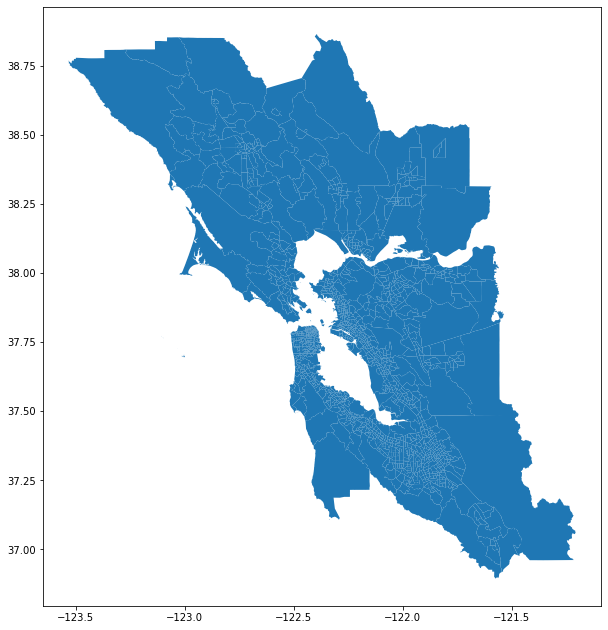

In [51]:
map_viz = gpd.read_file('jw123vr9109.shp')
fig, ax = plt.subplots(figsize = (10,15))
map_viz.plot(ax = ax);



Map resources gotten from : https://geodata.lib.berkeley.edu/catalog/stanford-jw123vr9109

In [52]:
# using CRS(Coordinate Reference Systems) to display coordinates as related to places on the Earth.
# using WGS84 latitude-longitude projection with a reference authority code "EPSG:4326".
#specifying the crs to use
crs = {'init' : 'epsg:4326'}

In [53]:
#specifying the geometry
geometry = [Point(xy) for xy in zip (bike_dfc['start_station_longitude'],bike_dfc['start_station_latitude'])]
geometry



 ...]

Creating the bike geo data frame

In [54]:
bike_geodf = gpd.GeoDataFrame(bike_dfc, # the dataframe to be used
                              crs = crs, #the Coordinate Refrence System being used
                              geometry = geometry) #specifying the list of geometric points
bike_geodf.head()
                              

C:\Users\Faluta Akinbowale\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_gender,bike_share_for_all_trip,duration_mins,duration_hours,member_age,start_time_month,start_time_dow,distance_km,speed_km/hr,geometry
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,Male,No,869.750000,14.495833,34,Feb,Thu,0.36,0.024835,POINT (-122.40081 37.78963)
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,Male,No,1030.900000,17.181667,46,Feb,Thu,2.64,0.153652,POINT (-122.42683 37.76931)
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,...,Other,No,608.166667,10.136111,29,Feb,Thu,0.27,0.026637,POINT (-122.44655 37.77484)
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,...,Male,Yes,26.416667,0.440278,44,Feb,Thu,2.65,6.018927,POINT (-122.27174 37.80456)
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,...,Male,No,29.883333,0.498056,59,Feb,Thu,2.32,4.658115,POINT (-122.39120 37.77041)


In [55]:
outlier_lat = bike_geodf[bike_geodf['start_station_latitude'] > 45]
outlier_long = bike_geodf[bike_geodf['start_station_longitude'] > -120]
bike_geodf = bike_geodf.drop(outlier_lat.index, axis=0)
bike_geodf = bike_geodf.drop(outlier_long.index, axis=0)

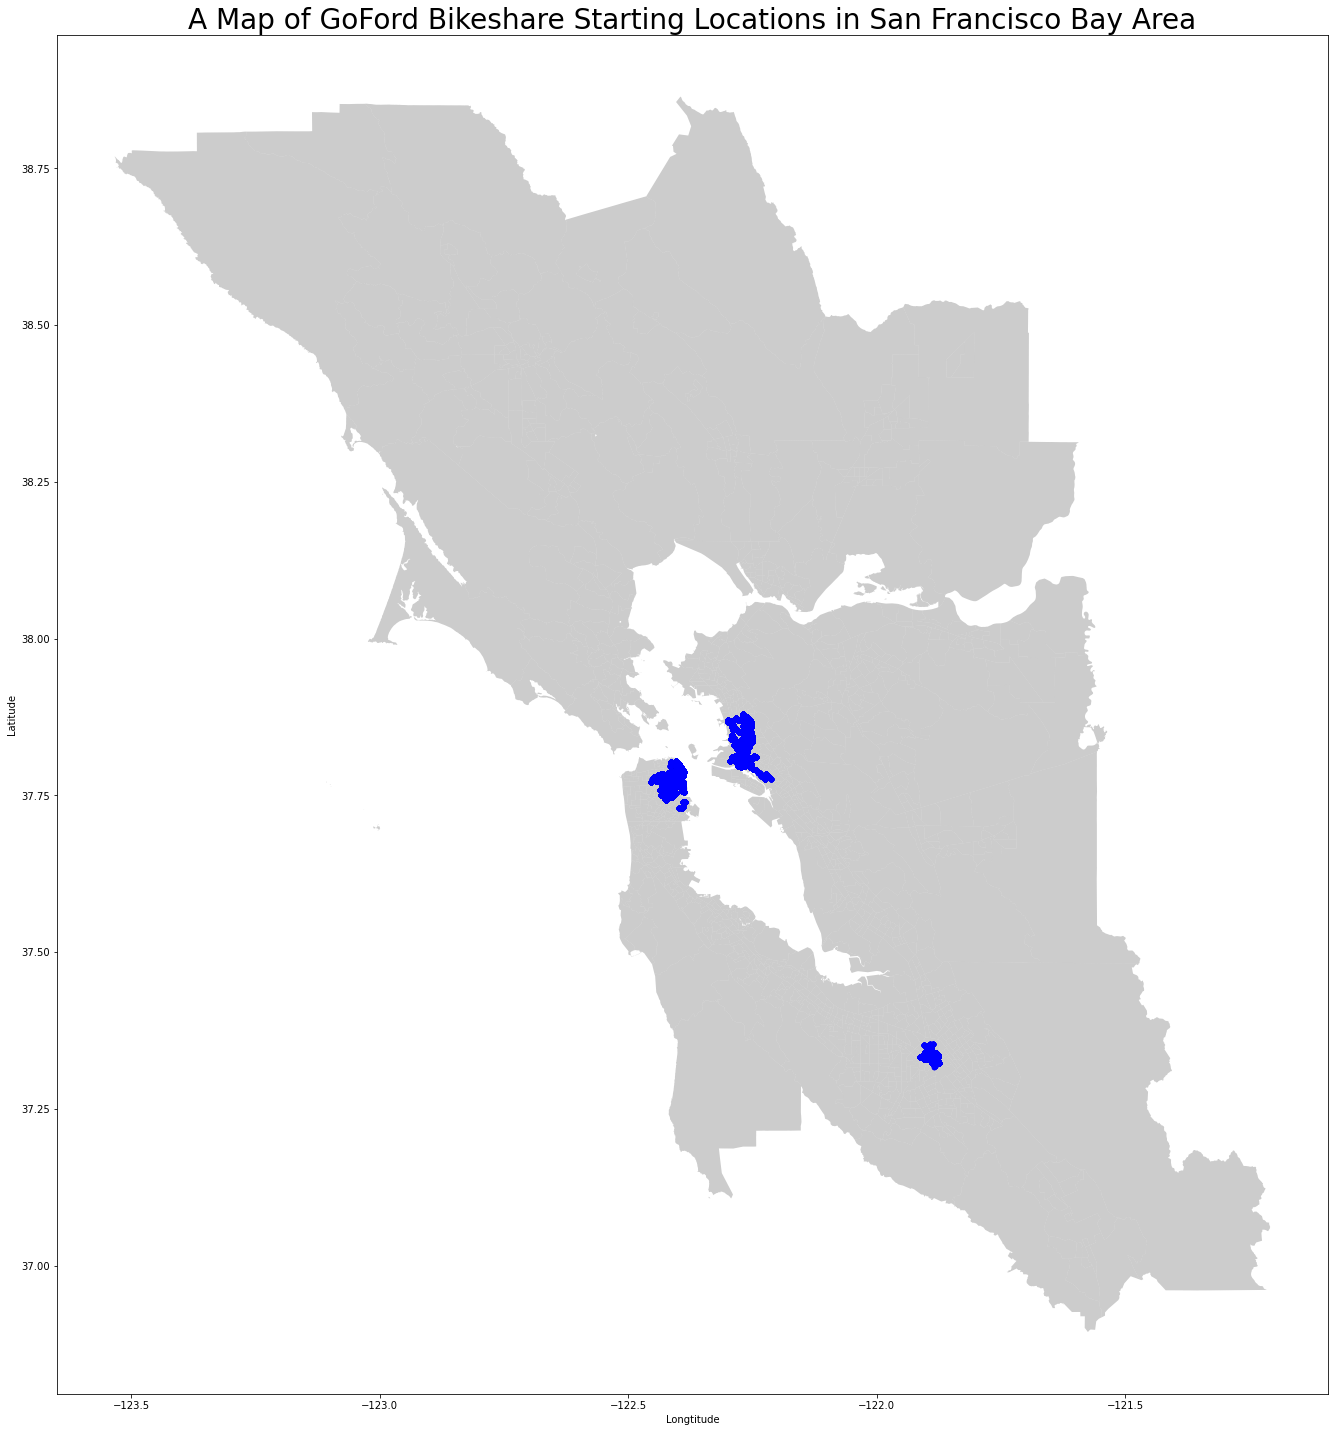

In [56]:
fig, ax = plt.subplots(figsize = (30, 25))
map_viz.plot(ax=ax, alpha = 0.4, color = "grey")

bike_geodf.plot(ax=ax, color = "blue", markersize = 20, marker = "o")
plt.title("A Map of GoFord Bikeshare Starting Locations in San Francisco Bay Area", fontsize=28)
plt.xlabel("Longtitude")
plt.ylabel("Latitude");





## Univariate Exploration

> In this section, distributions of individual variables are explored. This might expose unusual points or outliers to be dealt with.


>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [57]:
bike_geodf.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_gender,bike_share_for_all_trip,duration_mins,duration_hours,member_age,start_time_month,start_time_dow,distance_km,speed_km/hr,geometry
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,Male,No,869.750000,14.495833,34,Feb,Thu,0.36,0.024835,POINT (-122.40081 37.78963)
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,Male,No,1030.900000,17.181667,46,Feb,Thu,2.64,0.153652,POINT (-122.42683 37.76931)
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,...,Other,No,608.166667,10.136111,29,Feb,Thu,0.27,0.026637,POINT (-122.44655 37.77484)
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,...,Male,Yes,26.416667,0.440278,44,Feb,Thu,2.65,6.018927,POINT (-122.27174 37.80456)
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,...,Male,No,29.883333,0.498056,59,Feb,Thu,2.32,4.658115,POINT (-122.39120 37.77041)


In [58]:
bike_geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 171303 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171303 non-null  int64         
 1   start_time               171303 non-null  datetime64[ns]
 2   end_time                 171303 non-null  datetime64[ns]
 3   start_station_name       171303 non-null  object        
 4   start_station_latitude   171303 non-null  float64       
 5   start_station_longitude  171303 non-null  float64       
 6   end_station_name         171303 non-null  object        
 7   end_station_latitude     171303 non-null  float64       
 8   end_station_longitude    171303 non-null  float64       
 9   bike_id                  171303 non-null  int64         
 10  user_type                171303 non-null  category      
 11  member_birth_year        171303 non-null  int64         
 12  member_g

<b>Question 1:</b> Is there a difference in user type result before and after cleaning the dataset?


<b>Visualize:</b>

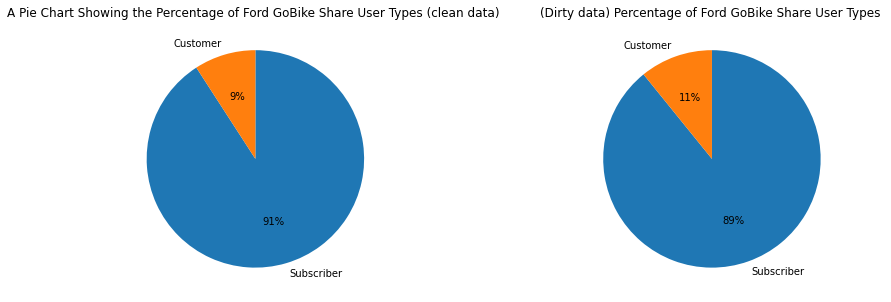

In [59]:
plt.figure(figsize =[15,5])
#clean data
plt.subplot(1,2,1)
data = bike_geodf['user_type'].value_counts() #This returns the count of values in this variable
#since it is a qualitative(categorical) datatype with two categories, a pie chart can be used to represent the data
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = False)
plt.title('A Pie Chart Showing the Percentage of Ford GoBike Share User Types (clean data) ');

#dirty data (original data set)
plt.subplot(1,2,2)
data = bike_df['user_type'].value_counts() #This returns the count of values in this variable
#since it is a qualitative(categorical) datatype with two categories, a pie chart can be used to represent the data
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = False)
plt.title('(Dirty data) Percentage of Ford GoBike Share User Types ');


#### <b>Observation:</b>
Upon cleaning the dataset, there was an increase in subscribers and a decrease in customers. From the left chart (cleaned data), It shows there are more subscribers than customers (casuals). This is a good indication for GoFord Bike business. 

<b>Question 2:</b> What is the month distribution of the data set?

Taking a look at start_time_month to know which month has the highest amount of users.

<b>Visualize:</b>

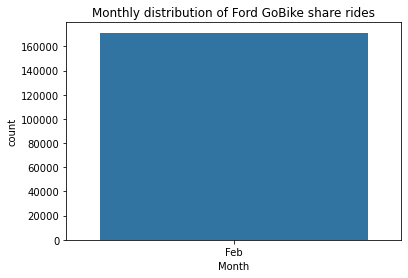

In [60]:
sns.countplot(data = bike_geodf, x = 'start_time_month', color = sns.color_palette()[0] )
plt.xlabel('Month')
plt.title('Monthly distribution of Ford GoBike share rides');

<b>Observation:</b>
Apparently the data only captures feburary 2019. As silly as this result sounds, I found out through this chart.

<b>Question 3:</b> How is the gender classification distributed in this dataset? 
<br> Is there a difference between the clean and dirty dataset of this variable?


<b>Visualize:</b>

Taking a look at the Gender proportion of the data

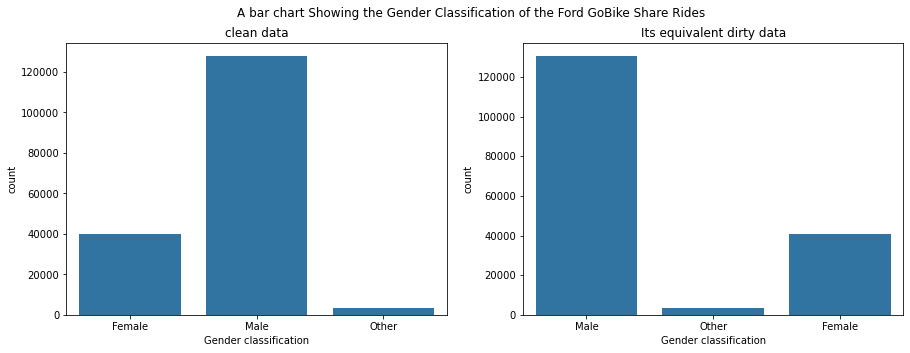

In [61]:
#A bar chart can be used to represent this qualitative(categorical) data type 
#using seaborn, setting base color to blue
# clean data

plt.figure(figsize = [15,5])
plt.suptitle('A bar chart Showing the Gender Classification of the Ford GoBike Share Rides')
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.countplot( data = bike_geodf, x = 'member_gender', color = base_color )
plt.xlabel('Gender classification')
plt.title('clean data');

#dirty data
plt.subplot(1,2,2)
base_color = sns.color_palette()[0]
sns.countplot( data = bike_df, x = 'member_gender', color = base_color)
plt.xlabel('Gender classification')
plt.title('Its equivalent dirty data');

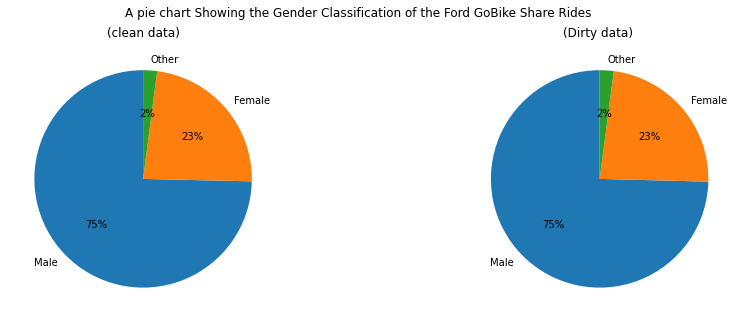

In [62]:
#using pie chart to show the distribution
plt.figure(figsize =[15,5])
plt.suptitle('A pie chart Showing the Gender Classification of the Ford GoBike Share Rides')
#clean data
plt.subplot(1,2,1)
data = bike_geodf['member_gender'].value_counts() #This returns the count of values in this variable
#since it is a qualitative(categorical) datatype with two categories, a pie chart can be used to represent the data
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = True)
plt.title('(clean data)');

#dirty data (original data set)
plt.subplot(1,2,2)
data = bike_df['member_gender'].value_counts() #This returns the count of values in this variable
#since it is a qualitative(categorical) datatype with two categories, a pie chart can be used to represent the data
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = True)
plt.title('(Dirty data) ');


<b>Observation:</b>

There is no change before and after cleaning the dataset.
<br>Males make up a 75% of the whole bike usage population.

<b>Question 4:</b> What is the usage frequency of GoFord Bike Share service by Days of The weak?

Investigating Days of the week, a Qualitative data type

<b>Visualize</b>

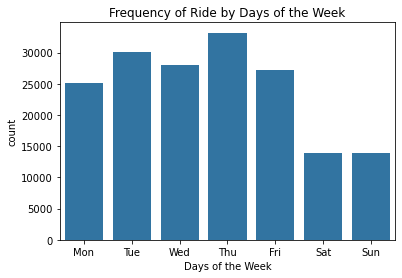

In [63]:
#using seaborn bar chart to visualize the data
dow_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
base_color = sns.color_palette()[0]
sns.countplot( data = bike_geodf, x = 'start_time_dow', color = base_color, order = dow_order)
plt.title('Frequency of Ride by Days of the Week')
plt.xlabel('Days of the Week');

<b>Observation:</b> There is a stronger use of the service during the weekdays than weekends. This might suggest that moat people use the service to commute to work. A break down of its user type will be usefull and more insightful.

<b>Question 5:</b>How many people use bike share for all trips ?
<br>Is there a change before and after cleaning the data ?

Visualizing bike_share_for_all_trip

<b>Visualize:</b>

Text(0.5, 1.0, 'Dirty Data')

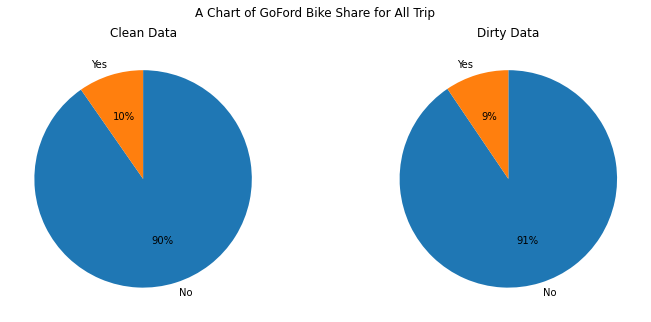

In [64]:
#using seaborn countplot
plt.figure(figsize =(12,5))
plt.suptitle('A Chart of GoFord Bike Share for All Trip')

plt.subplot(1,2,1)
data = bike_geodf['bike_share_for_all_trip'].value_counts()
plt.pie( data, labels = data.index, autopct = '%0.0f%%', startangle = 90, counterclock = False);
plt.title('Clean Data')

plt.subplot(1,2,2)
data = bike_df['bike_share_for_all_trip'].value_counts()
plt.pie( data, labels = data.index, autopct = '%0.0f%%', startangle = 90, counterclock = False);
plt.title('Dirty Data')

<b>Observation:</b> Majority of the users (90%) use bike share for all trips. Upon cleaning there was a percent change for both Yes and No category.

In [65]:
bike_geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 171303 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171303 non-null  int64         
 1   start_time               171303 non-null  datetime64[ns]
 2   end_time                 171303 non-null  datetime64[ns]
 3   start_station_name       171303 non-null  object        
 4   start_station_latitude   171303 non-null  float64       
 5   start_station_longitude  171303 non-null  float64       
 6   end_station_name         171303 non-null  object        
 7   end_station_latitude     171303 non-null  float64       
 8   end_station_longitude    171303 non-null  float64       
 9   bike_id                  171303 non-null  int64         
 10  user_type                171303 non-null  category      
 11  member_birth_year        171303 non-null  int64         
 12  member_g

In [90]:
bike_geodf.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_mins,duration_hours,member_age,distance_km,speed_km/hr
count,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000,171303.000000
mean,682.392474,37.771483,-122.352239,37.771683,-122.351806,4482.164002,1984.877498,11.373208,0.189553,33.122502,1.509297,9.790699
std,1535.111984,0.099627,0.116985,0.099528,0.116538,1660.016969,9.838262,25.585200,0.426420,9.838262,1.027008,4.294462
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1939.000000,1.016667,0.016944,17.000000,0.020000,0.005788
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3796.000000,1980.000000,5.383333,0.089722,26.000000,0.790000,6.694453
50%,508.000000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000,8.466667,0.141111,31.000000,1.220000,9.259615
75%,779.000000,37.797320,-122.283127,37.797320,-122.287610,5505.000000,1992.000000,12.983333,0.216389,38.000000,1.960000,12.566929
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000,1409.133333,23.485556,79.000000,63.800000,34.451613


<b> Question 6:</b> How is distance distributed in this dataframe ?

Plotting the distribution of distance.


<b>Visualize:</b> 

In [66]:
bike_geodf['distance_km'].describe()

count    171303.000000
mean          1.509297
std           1.027008
min           0.020000
25%           0.790000
50%           1.220000
75%           1.960000
max          63.800000
Name: distance_km, dtype: float64

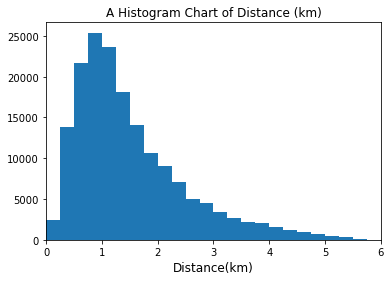

In [67]:
# this is a quantitative data type and it is best visualized using histogram.
bins = np.arange(0, 6, 0.25)
plt.hist( data = bike_geodf, x = 'distance_km', bins = bins);
plt.xlabel('Distance(km)', fontsize = 12)
plt.title('A Histogram Chart of Distance (km)')
plt.xlim([0,6]);

<b>Observation:<b> This is a unimodal and positively skewed variable

<b>Question:</b> How is speed distributed in this dataframe ?

Exploring speed

<b>Visualize:</b>


In [68]:
bike_geodf['speed_km/hr'].describe()

count    171303.000000
mean          9.790699
std           4.294462
min           0.005788
25%           6.694453
50%           9.259615
75%          12.566929
max          34.451613
Name: speed_km/hr, dtype: float64

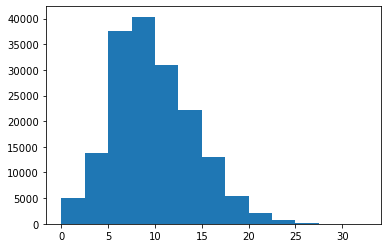

In [69]:
# this is a quantitative data type and it is best visualized using histogram.
bins = np.arange(0, 34, 2.5)
plt.hist( data = bike_geodf, x = 'speed_km/hr', bins = bins);


<b>Observation:</b> Speed is unimodal and right skewed. 

<b>Question 7:</b> How is duration in mins distributed in this dataframe ?

Exploring duration in minutes

<b>Visualize:</b>

In [70]:
bike_geodf['duration_mins'].describe()

count    171303.000000
mean         11.373208
std          25.585200
min           1.016667
25%           5.383333
50%           8.466667
75%          12.983333
max        1409.133333
Name: duration_mins, dtype: float64

(0.0, 80.0)

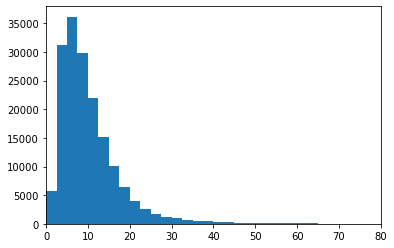

In [71]:
bins = np.arange(0, 75, 2.5)
plt.hist( data = bike_geodf, x = 'duration_mins', bins = bins)
plt.xlim([0,80])


<b>Observation:</b> The histogram depicts that majority of the rides are below 20 minutes. It has a right skewed distribution and it is unimodal.


<b>Question 8:</b> How is member age distributed in this dataframe?

Exploring age

<b>Visualize:</b>

(16.0, 85.0)

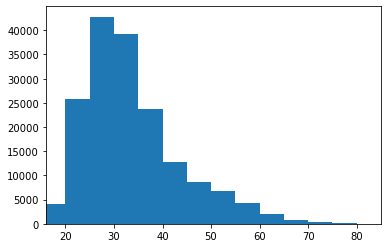

In [72]:
bins = np.arange(15, 81, 5)
plt.hist( data = bike_geodf, x = 'member_age', bins = bins)
plt.xlim([16,85])


<b>Observation:</b> The histogram depicts that a significant amount of people using this service are above 45 years old. With majority of its users ranging between 25 - 30 years old.


> The dataset definetly required cleaning which affect the result of the analysis. Upon cleaning some of the visuals changed, for instance, subscriber vs customer.Outliers were spotted using descriptive statistics and also histogram. A lot of transformations were done under feature engineering which enabled granted a deeper dive into the dataset. 

> A comparison between clean and dirty data was also made and that showed the effectiveness of a clean data and how it affects result. Operation were carried out to make the data more suitable to use; changing data types, extracting new data from existing data, dropping null values.

## Bivariate Exploration

> In this section, relationships between pairs of variables will be explored. Some of these variables have been introduced earlier but exploring how variables are related to one another give more meaning about the data at hand.

I am intresting in knowing how subscribers vs customers use the bike share service in terms of days of the week, age, gender, ride distance, duration of ride (time).

<b>Question 9:</b> How is user type distributed across days of the week?  


Exploring how subscribers and customers are distributed across days of th week

<b>Visualize:</b>


<Figure size 1080x360 with 0 Axes>

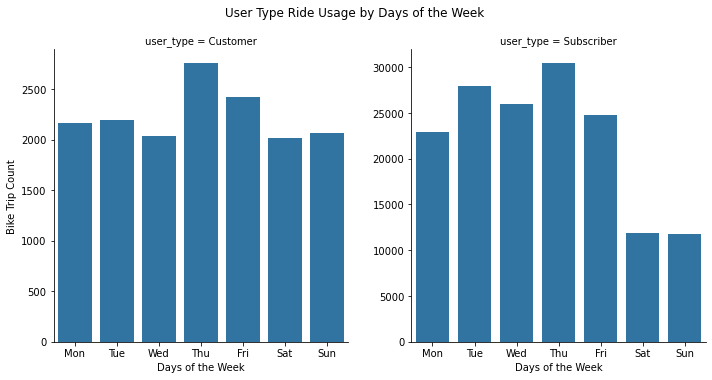

In [73]:
# this can be displayed by plotting either a clustered bar chart or two bar chart side by side.

plt.figure(figsize = [15,5]);
dow_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data= bike_geodf, x='start_time_dow', col="user_type", kind='count',
               sharey = False, order = dow_order, color = base_color);
g.fig.suptitle('User Type Ride Usage by Days of the Week ', y = 1.05)
g.set_axis_labels("Days of the Week", "Bike Trip Count");





<b>Observation:</b>
This shows that customers show consistency across the week while subscribers ride mostly during the weekdays with a sharp decline on weekends. Both seem to share the same peak day (Thursday). It will be insightful to see how gender plays a role here.

<b>Question 10:</b> Is there a difference in the average distance travelled by user type?

<b>Exploring subscribers vs customers by average distance (km) ridden </b>

user_type
Customer      1.768851
Subscriber    1.483183
Name: distance_km, dtype: float64


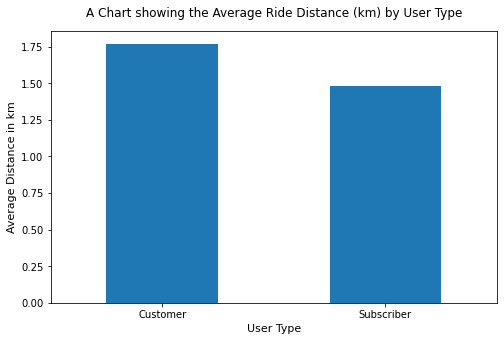

In [74]:
plt.figure(figsize = [8,5])
data = bike_geodf.groupby('user_type')['distance_km'].mean().plot( kind = 'bar')
plt.xticks(rotation =0)
plt.xlabel('User Type', fontsize =11)
plt.ylabel('Average Distance in km', fontsize =11)
plt.title('A Chart showing the Average Ride Distance (km) by User Type', y = 1.03);
print(bike_geodf.groupby('user_type')['distance_km'].mean());

<b>Observation:</b>
<br>The chart shows that customers ride for a longer distance(km), 1.77 as compared to 1.48 for subscribers.

<b>Question 11:</b> Is there a difference in average speed travelled by user type? 

<b>Visualize:</b>

<b>Exploring speed of customers vs subscribers, can this give more information about the chart above?</b>

user_type
Customer      8.168300
Subscriber    9.953925
Name: speed_km/hr, dtype: float64


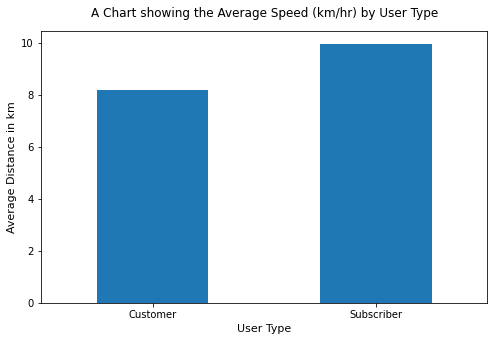

In [75]:
plt.figure(figsize = [8,5])
data = bike_geodf.groupby('user_type')['speed_km/hr'].mean().plot( kind = 'bar')
plt.xticks(rotation =0)
plt.xlabel('User Type', fontsize =11)
plt.ylabel('Average Distance in km', fontsize =11)
plt.title('A Chart showing the Average Speed (km/hr) by User Type', y = 1.03);
print(bike_geodf.groupby('user_type')['speed_km/hr'].mean());


<b>Observation:</b>
<br>Speed and distance are relative. This result gives more meaning to why subscribers have a lower distance travelled. The data shows that customers ride at a lower speed as comapred to subscribers, why?. Can age group be a factor?

<b>Question 12:</b> Is age group a factor affecting customer speed ?

<b>Feature engineering: Creating column for age group</b>

<b>Taking a look at age group classification</b>
<br> Young adults - (17-39)
<br> Middle aged adults- (40 - 59)
<br> Seniors (60 - 79)

In [76]:

# Create a new column and break down age into age groups

bike_geodf.loc[bike_geodf['member_age'].between(17,39) , 'age_group'] = 'young_adults'
bike_geodf.loc[bike_geodf['member_age'].between(40,59), 'age_group'] = 'm_aged_adults'
bike_geodf.loc[bike_geodf['member_age'].between(60,79), 'age_group'] = 'seniors'

In [77]:
bike_geodf['age_group'].info()

print('That was successful')

<class 'pandas.core.series.Series'>
Int64Index: 171303 entries, 0 to 183411
Series name: age_group
Non-Null Count   Dtype 
--------------   ----- 
171303 non-null  object
dtypes: object(1)
memory usage: 2.6+ MB
That was successful


Visualizing the Age group present in each user type. 

In [80]:
val = bike_geodf.groupby('user_type')['age_group'].value_counts()
val

user_type   age_group    
Customer    young_adults      12751
            m_aged_adults      2745
            seniors             163
Subscriber  young_adults     122725
            m_aged_adults     29886
            seniors            3033
Name: age_group, dtype: int64

In [81]:
customer = bike_geodf[bike_geodf['user_type'] == 'Customer']
c_prop = (customer['age_group'].value_counts() / customer['age_group'].count()) * 100
c_prop

young_adults     81.429210
m_aged_adults    17.529855
seniors           1.040935
Name: age_group, dtype: float64

In [82]:
customer

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,bike_share_for_all_trip,duration_mins,duration_hours,member_age,start_time_month,start_time_dow,distance_km,speed_km/hr,geometry,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,No,869.750000,14.495833,34,Feb,Thu,0.36,0.024835,POINT (-122.40081 37.78963),young_adults
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,No,1030.900000,17.181667,46,Feb,Thu,2.64,0.153652,POINT (-122.42683 37.76931),m_aged_adults
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,Valencia St at 21st St,37.756708,-122.421025,Broadway at Kearny,37.798014,-122.405950,5328,...,No,19.600000,0.326667,28,Feb,Thu,2.98,9.122449,POINT (-122.42103 37.75671),young_adults
26,385,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,The Embarcadero at Sansome St,37.804770,-122.403234,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6531,...,No,6.416667,0.106944,18,Feb,Thu,1.15,10.753247,POINT (-122.40323 37.80477),young_adults
31,223,2019-02-28 23:49:27.027,2019-02-28 23:53:10.535,The Embarcadero at Bryant St,37.787168,-122.388098,2nd St at Townsend St,37.780526,-122.390288,6267,...,No,3.716667,0.061944,25,Feb,Thu,0.46,7.426009,POINT (-122.38810 37.78717),young_adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183268,284,2019-02-01 05:59:17.516,2019-02-01 06:04:02.136,California St at University Ave,37.870555,-122.279720,10th St at University Ave,37.869060,-122.293400,4628,...,No,4.733333,0.078889,27,Feb,Fri,1.52,19.267606,POINT (-122.27972 37.87056),young_adults
183290,151,2019-02-01 05:33:14.263,2019-02-01 05:35:45.275,The Embarcadero at Bryant St,37.787168,-122.388098,The Embarcadero at Steuart St,37.791464,-122.391034,5122,...,No,2.516667,0.041944,27,Feb,Fri,0.41,9.774834,POINT (-122.38810 37.78717),young_adults
183330,503,2019-02-01 02:24:27.149,2019-02-01 02:32:50.295,Davis St at Jackson St,37.797280,-122.398436,Myrtle St at Polk St,37.785434,-122.419622,5120,...,No,8.383333,0.139722,23,Feb,Fri,2.46,17.606362,POINT (-122.39844 37.79728),young_adults
183338,528,2019-02-01 02:10:30.147,2019-02-01 02:19:18.896,University Ave at Oxford St,37.872355,-122.266447,Oregon St at Adeline St,37.857567,-122.267558,342,...,No,8.800000,0.146667,24,Feb,Fri,0.89,6.068182,POINT (-122.26645 37.87236),young_adults


In [83]:
subscriber = bike_geodf[bike_geodf['user_type'] == 'Subscriber']
s_prop = (subscriber['age_group'].value_counts() / subscriber['age_group'].count()) * 100
s_prop

young_adults     78.849811
m_aged_adults    19.201511
seniors           1.948678
Name: age_group, dtype: float64

<b>Visualize:</b>

<Figure size 432x288 with 0 Axes>

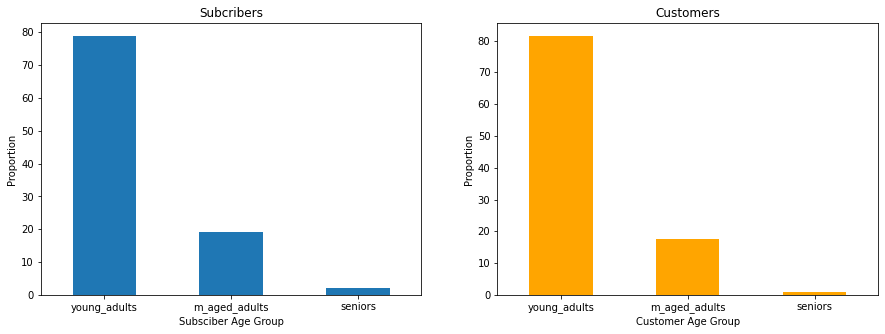

In [84]:
plt.suptitle('User Type Classified by Proportion of Age Group ')
plt.figure(figsize =[15,5])
plt.subplot(1,2,1)
s_prop.plot(kind='bar')

plt.xlabel('Subsciber Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation = 0)
plt.title('Subcribers')


plt.subplot(1,2,2)
c_prop.plot(kind='bar', color = 'orange')

plt.xlabel('Customer Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation = 0)
plt.title('Customers')
plt.show()

<b>Observation:</b>
<br>This shows that both user type category are populated with young adults. Is there a relationship between age and speed.

<b>Question 13:</b> Is there a relationship between age and speed? 

<b>Visualize:</b>

<b>Comparing age and speed</b>

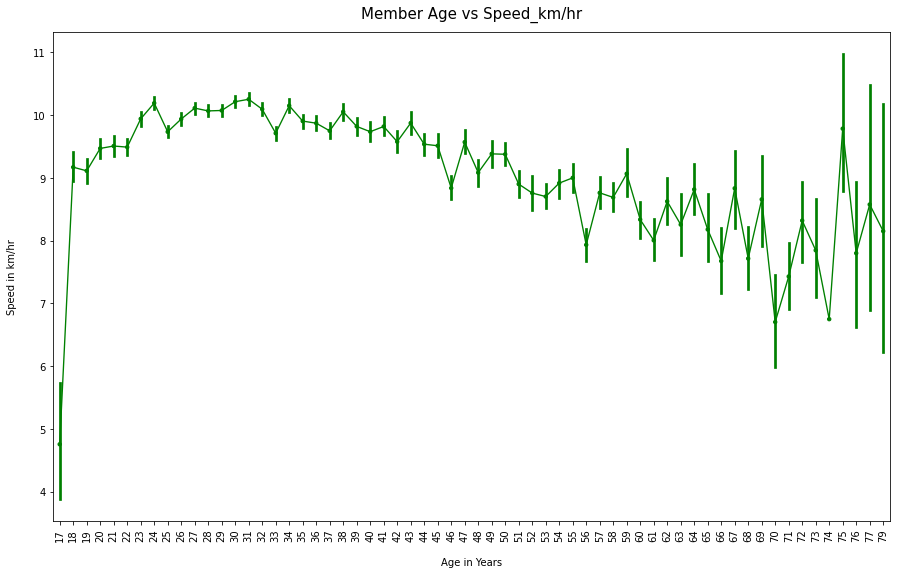

In [85]:
plt.figure(figsize=(15,9))
sns.pointplot(data = bike_geodf, x='member_age', y='speed_km/hr', scale=.5, color='green')
plt.title('Member Age vs Speed_km/hr', fontsize=15, y=1.015)
plt.xlabel('Age in Years', labelpad=16)
plt.ylabel('Speed in km/hr', labelpad=16)
plt.xticks(rotation = 90);

<b>Observation 1:</b>
<br>This chart shows that Young adult have the least flunctuating speed (definately an higher average speed)
<br> Speed drops as it approaches the middle_aged_adults.
<br>senior riders have a higher speed fluctuation with the lowest speed recorded. 

It will be intresting to see how distance impacts both age and speed.

For more clarity lets use box plots for age groups [Qualitative vs Quantitative] 

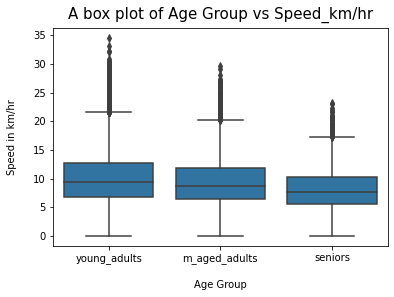

In [86]:
base_color = sns.color_palette()[0]
sns.boxplot(data = bike_geodf, x = 'age_group', y = 'speed_km/hr', color = base_color)
plt.title('A box plot of Age Group vs Speed_km/hr', fontsize=15, y=1.015)
plt.xlabel('Age Group', labelpad=16)
plt.ylabel('Speed in km/hr', labelpad=16)
plt.xticks(rotation =0 );

<b>Observation 2:</b>
<br>From the chart above it can be depicted that as age increases, average speed reduces.

This was drilled down because I was intrested in customer's lower speed. From the chart above, age class had negligible effect on customer speed as most customers were young adults who move at a faster speed that the other age groups. 

# Section Observation
> Customers were shown to use the service more than Subscribers on weekends while subscribers showed a more consistent usage of the service on weekdays. That might be a result of subscribers using the service as a means of transport to work. It is not surprising to see the average distance of subscribers being lower than customers as i would prefer to stay in close proximity to my work location. 

>Speed and Distance: The increase in speed can also be as a result of subscribers trying to get to work on time (probably some wake up late, or they ride fast as a means of excersie or pherhaps as a means to beat traffic?) which relates to a drop in distance. Meanwhile customers have higher distance hence a slower speed.


> I was intrested in developing age groups to see how that relates to speed and my opinion about it was backed up. Generally one would expect that as age increases,  average speed reduces (this was shown in the box plot)

## Multivariate Exploration

> Here, plots of three or more variables are created to investigate the previously explored data even
further.

<b>Question 14:</b> What is the effect of Distance and Speed on Age group?
> <br>Is there any relationship to be observed?


>In the previous section, I was intrested to see how age, distance and speed play out.

<b>Visualize:</b>


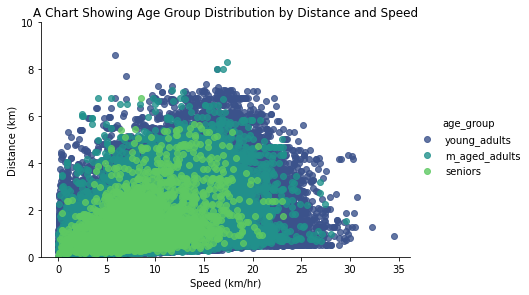

In [101]:
# for categorical variables
g = sns.FacetGrid(data = bike_geodf, hue = 'age_group', height = 4, aspect = 1.5, 
                  palette = 'viridis')
g = g.map(sns.regplot,'speed_km/hr','distance_km', x_jitter = 0.04, fit_reg = False)
g.add_legend()         
plt.xlabel('Speed (km/hr)')
plt.ylabel('Distance (km)')
plt.ylim(0,10) #to zoom in on high concentrationof data points
plt.title('A Chart Showing Age Group Distribution by Distance and Speed');

<b>Observation:</b>
><br>This chart showed what was concluded about speed earlier. As age increases speed decreases (majority of the seniors data points were within 4km and 20 km/hr. 
<br> Young adults travel the farthest distance with the highest speed. The data points shows the distribution of age groups with respect to distance and speed.

<b>Question 15:</b> Is a particular gender using the service more than others across days of the week?


As said in the bivariate section, I want to see <b>how gender plays a role in ride count across days of the week</b>.Is a particular gender using the service more than others on different days?

<b>Visualize:</b>

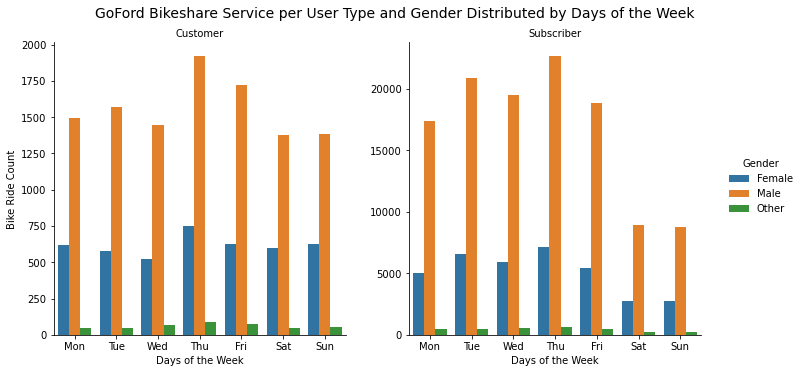

In [88]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=bike_geodf, x='start_time_dow', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Days of the Week", "Bike Ride Count")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('GoFord Bikeshare Service per User Type and Gender Distributed by Days of the Week', y=1.03, fontsize=14);

<b>Observation:</b>
<br> Males generally use the service more than any other gender.
This shows how gender contributes to rides on different days of the week. All gender (either they are a customer or subscriber) use this service the most on Thursday than any other day.
<br> There is a general number of ride decline across gender on weekends for subscribers. This has been proven earlier but now I get to see what gender contributed largely to this decline.  


> Age groups made it visible on the scatter plot, areas where different age groups were highly concentrated. 



> There weren't any surprising interactions. Instead it solidified and gave insights to the previously explored visualizations.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.


In the data exploration stage, univariate variables gave me an understanding of my data set and how clean vs dirty data affects data analysis result.

<br> Bivariate visualization helped me explore relationships between variables. Both univariate and bivariate exposed outliers in the dataset.

<br> Multivariate visualization gave insights and solidified the results gotten from bivariate explorations.



1. In terms of days of the week: Subscribers use the service consistently on weekdays with a sharp decline on weekends whereas Customers sees a consistent usage across the week. They both have a similar peak day, thursday. 

2. Age groups: The dataset is mostly made up of young adults, meaning that younger people used the service for the month of Feburary.

3-4. Speed & Distance: These are two relative variables. Subscribers see an increase in speed with a decrease in distance while this is vice versa for customers.

Creating age groups was the easiest way to classify a large group of data set into categories. This enable an easier handling of a quantitative variable as if it were a qualitative variable. 

Bonus: Age group data point showed the concentration of its different age class with respect to speed and distance. This further strenghtens the point in 3,4.


I expected subscribers to have a longer ride time and distance since they have shown a strong commitment to the continuous usage of the service but I was wrong. The result was in fact the oppposite of my expectations.

In [89]:
bike_geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 171303 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171303 non-null  int64         
 1   start_time               171303 non-null  datetime64[ns]
 2   end_time                 171303 non-null  datetime64[ns]
 3   start_station_name       171303 non-null  object        
 4   start_station_latitude   171303 non-null  float64       
 5   start_station_longitude  171303 non-null  float64       
 6   end_station_name         171303 non-null  object        
 7   end_station_latitude     171303 non-null  float64       
 8   end_station_longitude    171303 non-null  float64       
 9   bike_id                  171303 non-null  int64         
 10  user_type                171303 non-null  category      
 11  member_birth_year        171303 non-null  int64         
 12  member_g

In [91]:
bike_geodf.to_csv('clean_201902_fordgobike_tripdata.csv')